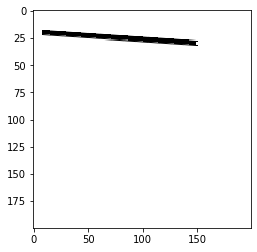

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

data=np.zeros((200,200,3), dtype=np.uint8)
data.fill(255)


def liniaN(x1, y1, x2, y2, g=1):
#jezeli odcinek jest punktem
    if x1==x2 and y1==y2:
        data[x1,y1]=0
        
    else:
        if abs(x2-x1)>abs(y2-y1):
            a = (y2-y1)/(x2-x1)
            if x1>x2:
                x1,x2 = x2,x1
                y1,y2 = y2,y1
            for x in range(x1,x2):
                y = round(y1+a*(x-x1))
                if g == 1:
                    data[y,x]=0
                else:
                    for i in range(-g//2, g//2):
                        data[y+i, x]=0
        else:
            a=(x2-x1)/(y2-y1)
            if y1>y2:
                x1,x2 = x2,x1
                y1,y2 = y2,y1
            for y in range(y1,y2):
                x = round(x1+a*(y-y1))
                if g == 1:
                    data[y,x]=0
                else:
                    for i in range(-g//2, g//2):
                        data[y+i, x]=0
    
def anti_alias(x1,x2,y1,y2):
    A = (y2-y1)/(x2-x1)
    B = -1
    C = y2 - A*x2



    for y in range(max(0,min(y1,y2)),min(max(y1,y2)+1,99)):
        for x in range(min(x1,x2),max(x1,x2)+1):
            d = abs(A*x+ B*y+C)/math.sqrt(A*A+B*B)
            if d<1:
                data [y,x] = 255*d
    return data
                


def linePZ(P1, P2, d, RGB):
    
    x1, x2 = P1
    y1, y2 = P2

    liniaN(x1,y1,x2,y2,d)
    
    return data

def linePZA(P1, P2, d, RGB):
    for i in range(0,1):
        
        x1, x2 = P1
        y1, y2 = P2
        c = d/2
        
        if c%2 == 0:
            c = int(c)
            anti_alias(x1,x2,y1+c,y2+c)
            anti_alias(x1,x2,y1-c,y2-c)
        else:
            c = int(c)
            anti_alias(x1,x2,y1+c,y2+c)
            c += 1
            anti_alias(x1,x2,y1-c,y2-c)
    
    liniaN(x1,y1,x2,y2,d)
    

    return data
    
linePZA((8,150),(20,30),4,data)

plt.imshow(data,interpolation='none')

# linePZ((8,150),(20,30),4,data)

# plt.imshow(data,interpolation='none')